<a href="https://colab.research.google.com/github/lalitroy/ML/blob/main/Feature_Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing important libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The original dataset is uploaded using the link. It has 3 columns (sex, smoker, region) with text labels.

In [36]:
df = pd.read_csv('https://raw.githubusercontent.com/lalitroy/ML/main/Encoding/insurance.csv')
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Handling Missing Data

It is important to handle missing data in the preprocessing step.
*   By deleting the entire row (not recommended)
*   By replacing the missing data by a median. For example,
``` df.colName = df.colName.fillna(df['colName'].median())```

The current dataset does not have any missing data.


In [37]:
df.isnull().sum() # Transport column has a null value

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Measures of Central Tendency

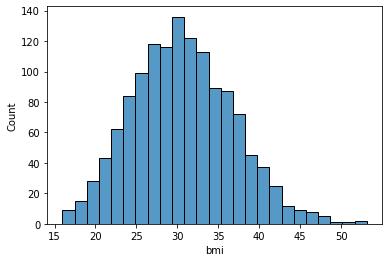

In [38]:
import seaborn as sns
sns.histplot(df['bmi'])

In [39]:
# z score with python

In [40]:
print('The mean of BMI and age are %2.3f and %2.3f respectively' % (df['bmi'].mean(), df['age'].mean()))
print('The median of BMI and age are %2.3f and %2.3f respectively' % (df['bmi'].median(), df['age'].median()))

The mean of BMI and age are 30.663 and 39.207 respectively
The median of BMI and age are 30.400 and 39.000 respectively


# Replace()

This can be used to replace the labels with user defined number but is not a good practice

In [41]:
df1=df.copy()
df1['region'].unique()
df1.iloc[:,5].unique()
df1.region = df.region.replace(['southwest', 'southeast', 'northwest', 'northeast'] , [0,1,2,3])
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,0,16884.92400
1,18,male,33.770,1,no,1,1725.55230
2,28,male,33.000,3,no,1,4449.46200
3,33,male,22.705,0,no,2,21984.47061
4,32,male,28.880,0,no,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,2,10600.54830
1334,18,female,31.920,0,no,3,2205.98080
1335,18,female,36.850,0,no,1,1629.83350
1336,21,female,25.800,0,no,0,2007.94500


# Encoding

This is a preprocessing step to prepare the dataset. The purpose is to convert the human-readable labels (in one or multiple columns) into machine-readable numbers. There are many types of encoding such as
* Label Encoding
* One Hot Encoding
* Ordinal Encoding

## Label Encoding

The ```LabelEncoder``` module from python's ```sklearn```'s ```preprocessing``` library assigns a unique number to each label. It starts from 0 and maintains the alphabetic order of the labels. 

**It creates an artificial priority**

Click [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to go to the library page.

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le = LabelEncoder()
df2 = df.copy() 
df2['sex'] = le.fit_transform(df2['sex'])
df2['region'] = le.fit_transform(df2['region'])
df2['smoker'] = le.fit_transform(df2['smoker'])
df2

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


## One Hot Encoding

The features with text labels are converted to 0 and 1. Each unique label will get its own column. 

In [52]:
df3 = df.copy()
dummy = pd.get_dummies(df3['sex'])
df3

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Since the dummy variables we generated for ```'sex'``` column, this will be dropped and dummy variables will be introduced.

In [53]:
df3 = pd.concat([df,dummy],axis=1)

,age,sex,bmi,children,smoker,region,charges,female,male
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


In [54]:
df3.drop('sex', axis='columns', inplace=True)

,age,bmi,children,smoker,region,charges,female,male
0,19,27.900,0,yes,southwest,16884.92400,1,0
1,18,33.770,1,no,southeast,1725.55230,0,1
2,28,33.000,3,no,southeast,4449.46200,0,1
3,33,22.705,0,no,northwest,21984.47061,0,1
4,32,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,northwest,10600.54830,0,1
1334,18,31.920,0,no,northeast,2205.98080,1,0
1335,18,36.850,0,no,southeast,1629.83350,1,0
1336,21,25.800,0,no,southwest,2007.94500,1,0


### Dummy trap

While using One Hot Encoding, it is needed to be aware of dummy trap which occurs due to collinearity among dummy variables. To avoid this, one dummy variable is dropped.

In [67]:
df4 = df.copy()
dummy1 = pd.get_dummies(df4['sex'],drop_first=True, prefix='Dummy_sex')
dummy2 = pd.get_dummies(df4['smoker'],drop_first=True, prefix='Dummy_smoker')
dummy3 = pd.get_dummies(df4['region'],drop_first=True, prefix='Dummy_region')
df4 = pd.concat([df4,dummy1,dummy2,dummy3],axis=1)
df4.drop(['sex','smoker','region'],axis=1,inplace=True)
df4.head()

,age,bmi,children,charges,Dummy_sex_male,Dummy_smoker_yes,Dummy_region_northwest,Dummy_region_southeast,Dummy_region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


### One hot encoding using loop

In [75]:
df5 = df.copy()

columns = ['sex','smoker','region']

for col in columns:
    one_hot = pd.get_dummies(df5[col],drop_first=True, prefix='dummy_'+col)
    df5 = pd.concat([df5 , one_hot], axis=1).drop(col,axis=1)

df5.head()

,age,bmi,children,charges,dummy_sex_male,dummy_smoker_yes,dummy_region_northwest,dummy_region_southeast,dummy_region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


## Ordinal Encoder

This is used when there is an order among the text labels

In [77]:
df6=df.copy()
sex = df6.sex.unique()

array(['female', 'male'], dtype=object)

In [78]:
from sklearn.preprocessing import OrdinalEncoder
ordi = OrdinalEncoder(categories=[sex])

In [80]:
ordi


OrdinalEncoder(categories=[array(['female', 'male'], dtype=object)])

In [81]:
encoded_values = ordi.fit_transform(df6[['sex']])
encoded_values

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [82]:
encoded = pd.DataFrame(encoded_values , columns=['encoded_values'])

In [83]:
encoded.head()

,encoded_values
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0


In [84]:
df6['sex'] = encoded['encoded_values']

In [85]:
df6.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,yes,southwest,16884.92400
1,18,1.0,33.770,1,no,southeast,1725.55230
2,28,1.0,33.000,3,no,southeast,4449.46200
3,33,1.0,22.705,0,no,northwest,21984.47061
4,32,1.0,28.880,0,no,northwest,3866.85520
